# Redes Complejas en Python con NetworkX – Cuaderno de Ejemplos Prácticos

Este cuaderno demostrativo enseña cómo usar **NetworkX** para crear y analizar redes complejas de forma genérica.

In [36]:
# Importar la biblioteca NetworkX
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np


## 2. Creación de redes básicas (añadir nodos y aristas)

Nodos del grafo: [1, 2, 3, 4, 5, 6]
Aristas del grafo: [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6)]
Número de nodos: 6
Número de aristas: 6


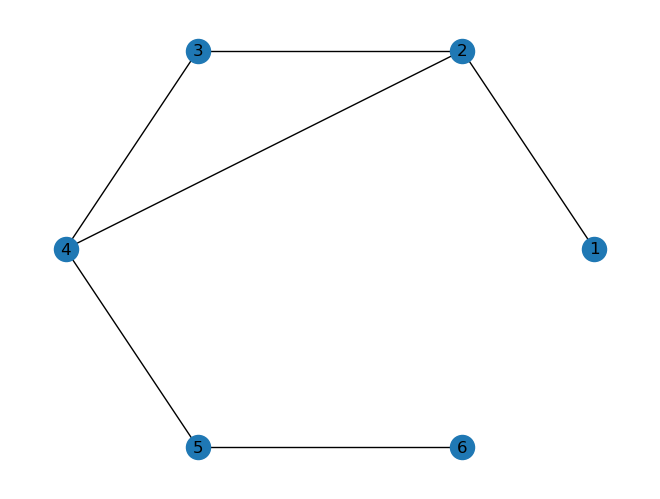

In [56]:
# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos y aristas
G.add_node(1)
G.add_nodes_from([2, 3, 4])
G.add_edge(1, 2)
G.add_edge(5, 6)
G.add_edges_from([(2, 3), (2, 4), (3, 4), (4, 5)])

# Mostrar nodos y aristas
print("Nodos del grafo:", G.nodes())
print("Aristas del grafo:", G.edges())
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

#nx.draw(G, with_labels=True)
nx.draw(G, pos=pos_circular, with_labels=True)

## 3. Generación de redes sintéticas (Erdős–Rényi, Watts–Strogatz, Barabási–Albert)

Grafo ER - nodos: 100 | aristas: 251
Grafo WS - nodos: 100 | aristas: 200
Grafo BA - nodos: 100 | aristas: 196


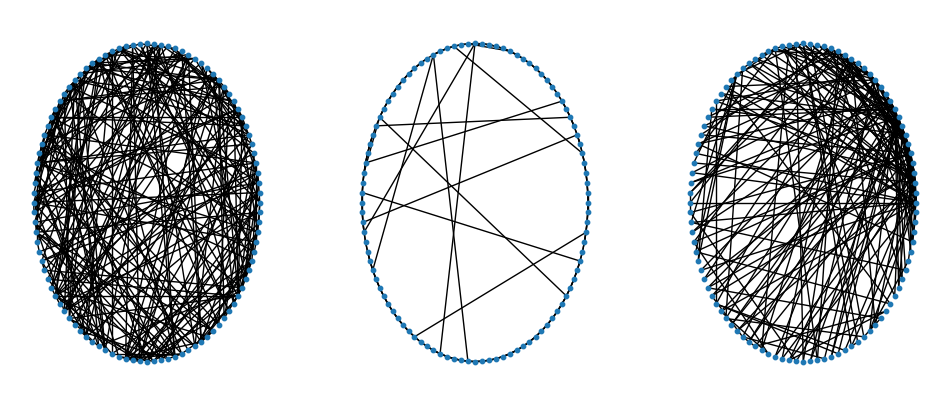

In [27]:
# Grafo aleatorio Erdős–Rényi
G_er = nx.erdos_renyi_graph(n=100, p=0.05)
print("Grafo ER - nodos:", G_er.number_of_nodes(), "| aristas:", G_er.number_of_edges())

# Grafo pequeño mundo Watts–Strogatz
G_ws = nx.watts_strogatz_graph(n=100, k=4, p=0.07)
print("Grafo WS - nodos:", G_ws.number_of_nodes(), "| aristas:", G_ws.number_of_edges())

# Grafo Barabási–Albert
G_ba = nx.barabasi_albert_graph(n=100, m=2)
print("Grafo BA - nodos:", G_ba.number_of_nodes(), "| aristas:", G_ba.number_of_edges())


fig, axes= plt.subplots(1, 3, figsize=(12, 5))

for ax, net in zip(axes.flatten(), (G_er, G_ws, G_ba)):
    nx.draw(net, ax=ax, pos=nx.circular_layout(G), node_size=10)


## 4. Cálculo de propiedades y métricas

In [31]:
# Grados
grados = dict(G.degree())
print("Grado de cada nodo:", grados)
grado_promedio = sum(grados.values()) / G.number_of_nodes()
print(f"Grado promedio: {grado_promedio:.2f}")
print("\n")

# Clustering
clustering_nodos = nx.clustering(G)
print("Clustering de cada nodo:", clustering_nodos)
clustering_promedio = nx.average_clustering(G)
print(f"Clustering promedio de la red: {clustering_promedio:.2f}")
print("\n")

# Caminos más cortos
camino_1_6 = nx.shortest_path(G, source=1, target=6)
longitud_1_6 = nx.shortest_path_length(G, 1, 6)
print("Camino más corto entre 1 y 6:", camino_1_6)
print("Longitud de ese camino:", longitud_1_6)
print("\n")

# Diámetro
diametro = nx.diameter(G)
print("Diámetro del grafo G:", diametro)
print("\n")


Grado de cada nodo: {1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 1}
Grado promedio: 2.00


Clustering de cada nodo: {1: 0, 2: 0.3333333333333333, 3: 1.0, 4: 0.3333333333333333, 5: 0, 6: 0}
Clustering promedio de la red: 0.28


Camino más corto entre 1 y 6: [1, 2, 4, 5, 6]
Longitud de ese camino: 4


Diámetro del grafo G: 4




## 5. Algoritmos básicos (detección de comunidades, PageRank)

In [32]:
# PageRank
page_ranks = nx.pagerank(G_ba, alpha=0.85)
print("PageRank de los nodos:")
for nodo, valor in page_ranks.items():
    print(f"  Nodo {nodo}: {valor:.4f}")

# Detección de comunidades
comunidades = nx.algorithms.community.greedy_modularity_communities(G_ba)
print("\nComunidades encontradas:")
for i, comunidad in enumerate(comunidades):
    print(f"  Comunidad {i+1}: {list(comunidad)}")


PageRank de los nodos:
  Nodo 0: 0.0568
  Nodo 1: 0.0034
  Nodo 2: 0.0349
  Nodo 3: 0.0337
  Nodo 4: 0.0054
  Nodo 5: 0.0347
  Nodo 6: 0.0228
  Nodo 7: 0.0163
  Nodo 8: 0.0280
  Nodo 9: 0.0219
  Nodo 10: 0.0348
  Nodo 11: 0.0328
  Nodo 12: 0.0055
  Nodo 13: 0.0123
  Nodo 14: 0.0280
  Nodo 15: 0.0098
  Nodo 16: 0.0101
  Nodo 17: 0.0079
  Nodo 18: 0.0197
  Nodo 19: 0.0126
  Nodo 20: 0.0148
  Nodo 21: 0.0103
  Nodo 22: 0.0078
  Nodo 23: 0.0079
  Nodo 24: 0.0080
  Nodo 25: 0.0123
  Nodo 26: 0.0079
  Nodo 27: 0.0082
  Nodo 28: 0.0129
  Nodo 29: 0.0149
  Nodo 30: 0.0056
  Nodo 31: 0.0057
  Nodo 32: 0.0054
  Nodo 33: 0.0054
  Nodo 34: 0.0079
  Nodo 35: 0.0150
  Nodo 36: 0.0056
  Nodo 37: 0.0080
  Nodo 38: 0.0055
  Nodo 39: 0.0078
  Nodo 40: 0.0079
  Nodo 41: 0.0056
  Nodo 42: 0.0055
  Nodo 43: 0.0057
  Nodo 44: 0.0080
  Nodo 45: 0.0055
  Nodo 46: 0.0056
  Nodo 47: 0.0054
  Nodo 48: 0.0056
  Nodo 49: 0.0081
  Nodo 50: 0.0057
  Nodo 51: 0.0082
  Nodo 52: 0.0080
  Nodo 53: 0.0056
  Nodo 54: 0.00

## 6. Obtener y trabajar con la matriz de adjacencia o laplaciana

In [45]:

# Obtener la matriz de adyacencia como un array de NumPy
A = nx.to_numpy_array(G, dtype=int)

print("Matriz de adyacencia:")
print(A)


## También se puede obtener una red dada una matriz de adyacencia##

G2 = nx.from_numpy_array(A)

print("Nodos de G2:", G2.nodes())
print("Aristas de G2:", G2.edges())

## También se puede hacer lo mismo con la matriz laplaciana ##

L = nx.laplacian_matrix(G).toarray()

# Obtener la matriz de adyacencia desde la Laplaciana
# A = D - L, donde D es la matriz diagonal de grados
A = np.diag(np.diag(L)) - L

# Crear grafo desde la matriz de adyacencia
G2 = nx.from_numpy_array(A)

# Mostrar nodos y aristas
print("Nodos de G2:", G2.nodes())
print("Aristas de G2:", G2.edges())


Matriz de adyacencia:
[[0 1 0 0 0 0]
 [1 0 1 1 0 0]
 [0 1 0 1 0 0]
 [0 1 1 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]]
Nodos de G2: [0, 1, 2, 3, 4, 5]
Aristas de G2: [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]
Nodos de G2: [0, 1, 2, 3, 4, 5]
Aristas de G2: [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]


## 7. Modelos de ecuaciones diferenciales conectados mediante una red compleja

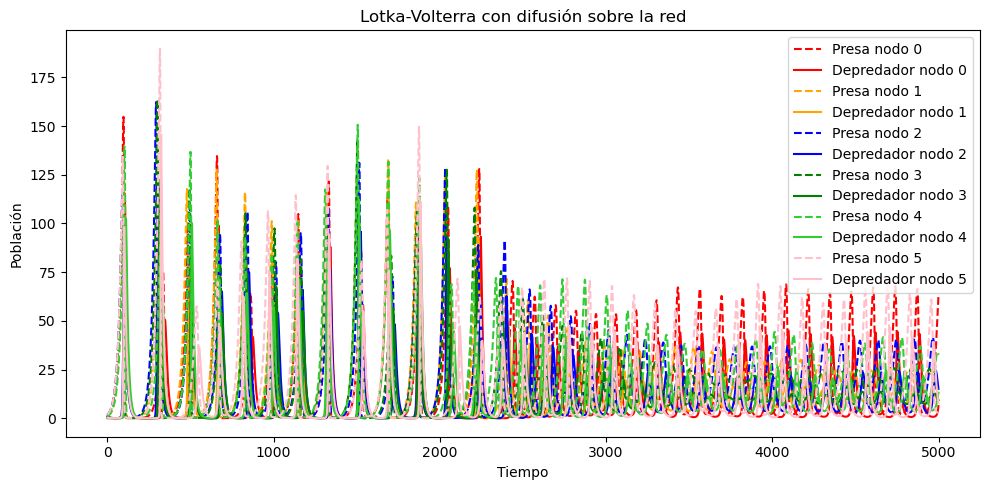

In [54]:

# Parámetros del modelo Lotka-Volterra
alpha = 1.0   # tasa de crecimiento de presas
beta = 0.1    # tasa de depredación
delta = 0.075 # eficiencia del depredador
gamma = 1.5   # tasa de muerte de depredadores

Dx = 0.01  # difusión de presas
Dy = 0.02 # difusión de depredadores


# Número de nodos
N = len(G)

# Inicializar poblaciones (x: presas, y: depredadores)
x = np.random.rand(N) + 1.0  # presas
y = np.random.rand(N)        # depredadores

# Guardar historia
T = 5000
dt = 0.05
x_hist = np.zeros((T, N))
y_hist = np.zeros((T, N))

for t in range(T):
    # Guardar estado actual
    x_hist[t] = x
    y_hist[t] = y

    # Difusión: laplaciano discreto (A(x_j - x_i))
    diffusion_x = Dx * (A @ x - np.sum(A, axis=1) * x)
    diffusion_y = Dy * (A @ y - np.sum(A, axis=1) * y)

    # Dinámica local + difusión
    dx = alpha * x - beta * x * y + diffusion_x
    dy = delta * x * y - gamma * y + diffusion_y

    # Euler
    x = x + dt * dx
    y = y + dt * dy

# Plot resultado para cada nodo
plt.figure(figsize=(10, 5))
colors= ('red', 'orange', 'blue', 'green', 'limegreen', 'pink')
for i in range(N):
    plt.plot(x_hist[:, i], label=f'Presa nodo {i}', linestyle='--', color=colors[i])
    plt.plot(y_hist[:, i], label=f'Depredador nodo {i}', color=colors[i])
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Lotka-Volterra con difusión sobre la red")
plt.legend()
plt.tight_layout()
plt.show()


## 8. Guardado y carga de redes en distintos formatos

In [ ]:
# Guardar en edge list
nx.write_edgelist(G, "mi_red.edgelist", data=False)

# Cargar desde edge list
G2 = nx.read_edgelist("mi_red.edgelist", nodetype=int)
print("Nodos en G2 cargado:", G2.nodes())
print("Aristas en G2 cargado:", G2.edges())

# Guardar en GML
nx.write_gml(G, "mi_red.gml")

# Cargar desde GML
G3 = nx.read_gml("mi_red.gml")
print("Nodos en G3 cargado:", G3.nodes())
print("Aristas en G3 cargado:", G3.edges())
